In [3]:
pip install ripser persim

  Using cached ripser-0.6.10-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.5 kB)
  Using cached persim-0.3.7-py3-none-any.whl.metadata (3.8 kB)
  Using cached hopcroftkarp-1.2.5.tar.gz (16 kB)
  Preparing metadata (setup.py) ... done
Using cached ripser-0.6.10-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (834 kB)
Using cached persim-0.3.7-py3-none-any.whl (48 kB)
  Created wheel for hopcroftkarp: filename=hopcroftkarp-1.2.5-py2.py3-none-any.whl size=18102 sha256=09be9714364faf5f171955dd8aff2dd14b1846d4512b2b02638427b28f242b24
  Stored in directory: /root/.cache/pip/wheels/ef/0f/3b/0f931844eecc34addd90e72d54cd39c08b7066c5f25c00b9a4
Successfully built hopcroftkarp


In [4]:
import pandas as pd

# Path to the dataset
file_path = '/content/DOD proposals and awards 2010 to the present v3.xlsx'

# Load the data
data = pd.read_excel(file_path)




In [5]:
# Column indices for important data
college_col = 10  # Index for the college name column

# Group by college and count total submissions
college_submission_counts = data.iloc[:, college_col].value_counts()

# Identify the college with the most submissions
top_college = college_submission_counts.idxmax()
print(f"The college with the most submissions is: {top_college}")

# Display the submission counts for reference
print(college_submission_counts)


The college with the most submissions is: James C Wyant Coll Optical Sci
Lead Investigator Organization Name
James C Wyant Coll Optical Sci    213
Aerospace & Mechanical Engr       203
Electrical and Computer Engr      148
Psychiatry                        123
Materials Science & Engr           55
                                 ... 
Sch Middle E/N African Studies      1
Lunar and Planetary Laboratory      1
Social & Behavioral Sci Admin       1
Linguistics                         1
Space 4 Center                      1
Name: count, Length: 96, dtype: int64


In [6]:
# Filter data for the top college
filtered_data = data[data.iloc[:, 10] == top_college]




In [7]:
# Column indices for important data
professor_col = 9  # Lead investigator name
status_col = 8     # Proposal status

# Define funded and rejected statuses
funded_status = "Funded"
rejected_statuses = {"Rejected", "Withdrawn", "Deactivated"}

# Filter out pending proposals
filtered_data = filtered_data[~filtered_data.iloc[:, status_col].isin(["Pending"])]

# Group data by professor and calculate total submissions and acceptance rates
professor_stats = filtered_data.groupby(filtered_data.iloc[:, professor_col]).apply(
    lambda group: pd.Series({
        "Total_Submissions": len(group),
        "Funded_Count": sum(group.iloc[:, status_col] == funded_status),
        "Acceptance_Rate": sum(group.iloc[:, status_col] == funded_status) /
                           len(group)
    })
)

# Sort professors by total submissions and break ties by acceptance rate
professor_stats = professor_stats.sort_values(
    by=["Total_Submissions", "Acceptance_Rate"], ascending=[False, False]
)

# Select the top 5 professors
top_5_professors = professor_stats.head(5)

# Display the top 5 professors
print("Top 5 Professors with the Most Submissions:")
print(top_5_professors)


Top 5 Professors with the Most Submissions:
                        Total_Submissions  Funded_Count  Acceptance_Rate
Lead Investigator Name                                                  
Moloney,Jerome V                     24.0          18.0         0.750000
Polynkin,Pavel G                     21.0           9.0         0.428571
Guha,Saikat                          20.0          14.0         0.700000
Peyghambarian,Nasser N               19.0           9.0         0.473684
Jones,Ronald J                       11.0           7.0         0.636364


This is the main code!

<ipython-input-8-8f63b4c8e7aa>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_professors["Proposals_Per_Year"] = top_5_professors["Total_Submissions"] / (2024 - 2010)
<ipython-input-8-8f63b4c8e7aa>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_professors["Funded_Per_Year"] = top_5_professors["Funded_Count"] / (2024 - 2010)
<ipython-input-8-8f63b4c8e7aa>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

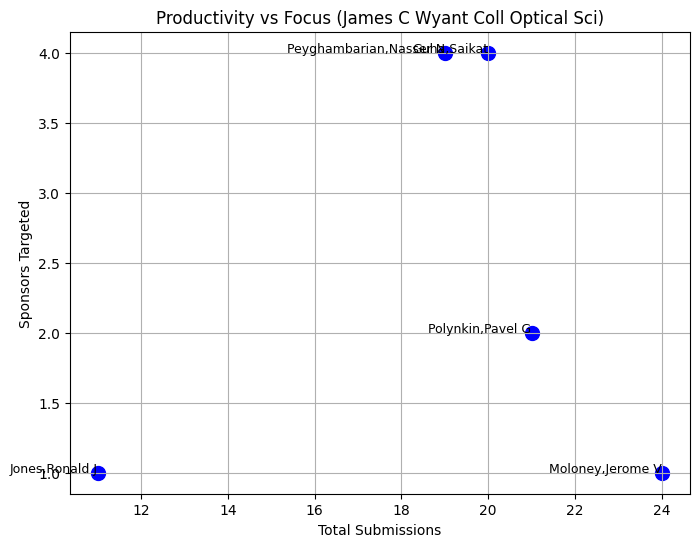

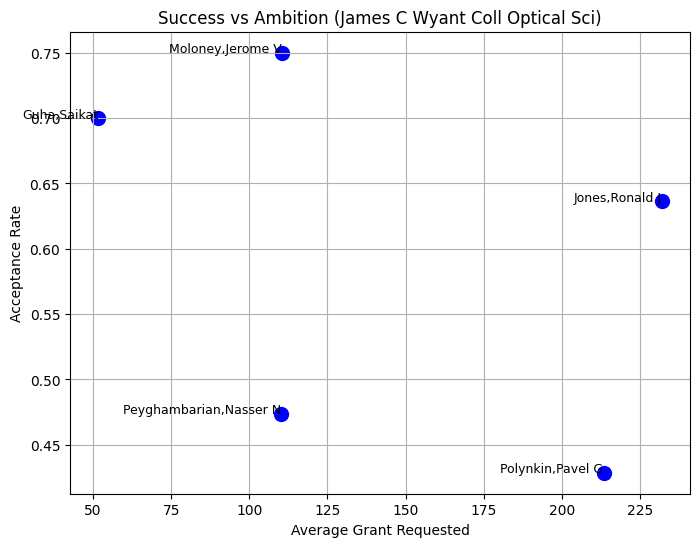

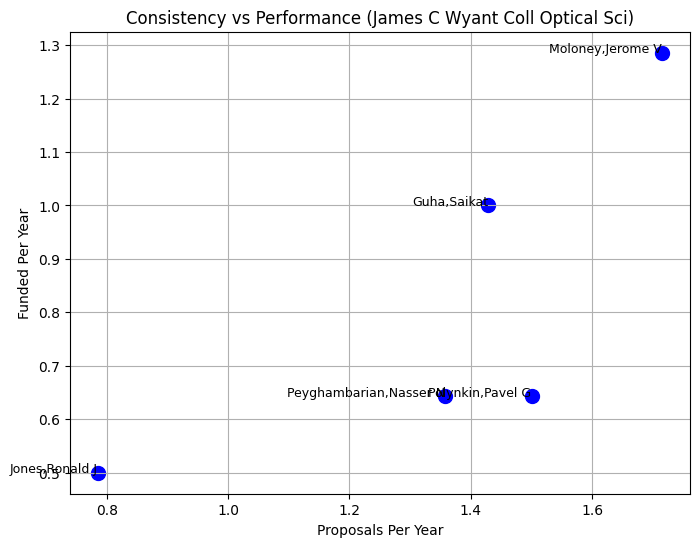

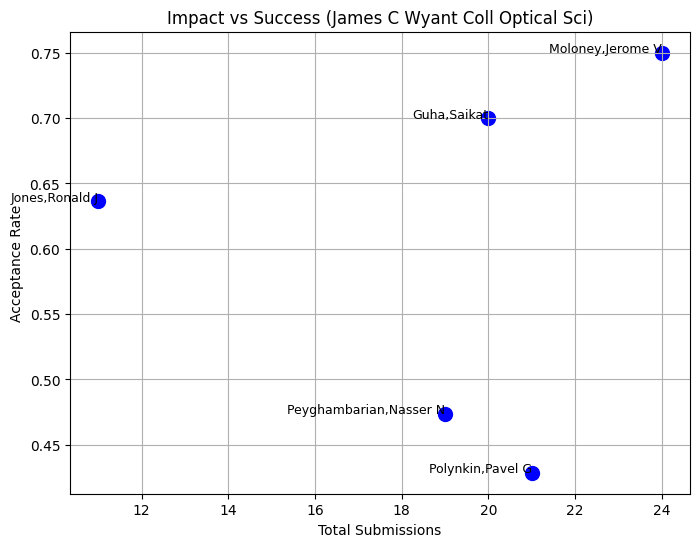

<ipython-input-8-8f63b4c8e7aa>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_professors["Proposals_Per_Year"] = top_5_professors["Total_Submissions"] / (2024 - 2010)
<ipython-input-8-8f63b4c8e7aa>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_professors["Funded_Per_Year"] = top_5_professors["Funded_Count"] / (2024 - 2010)
<ipython-input-8-8f63b4c8e7aa>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

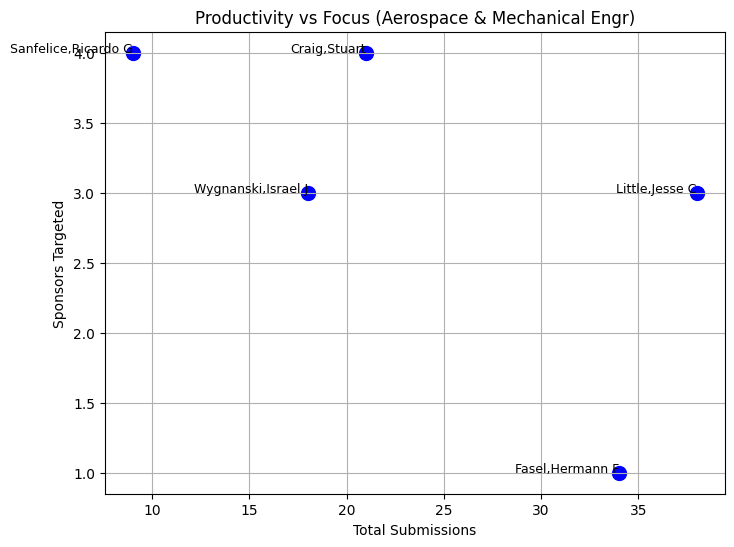

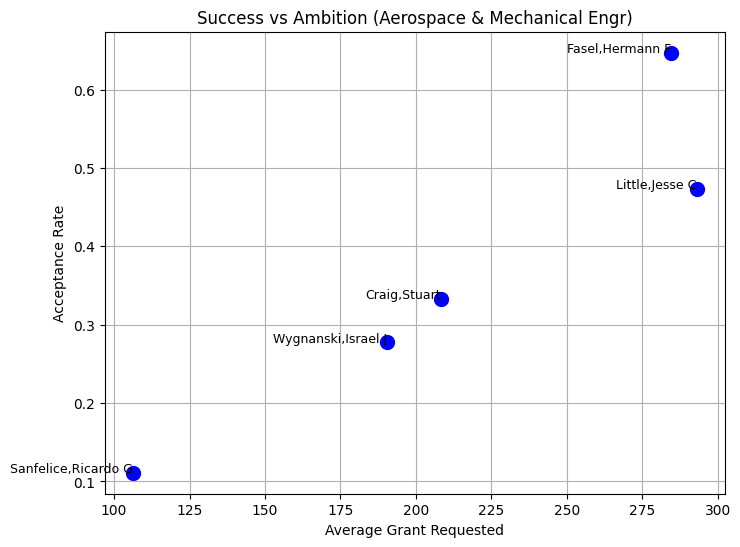

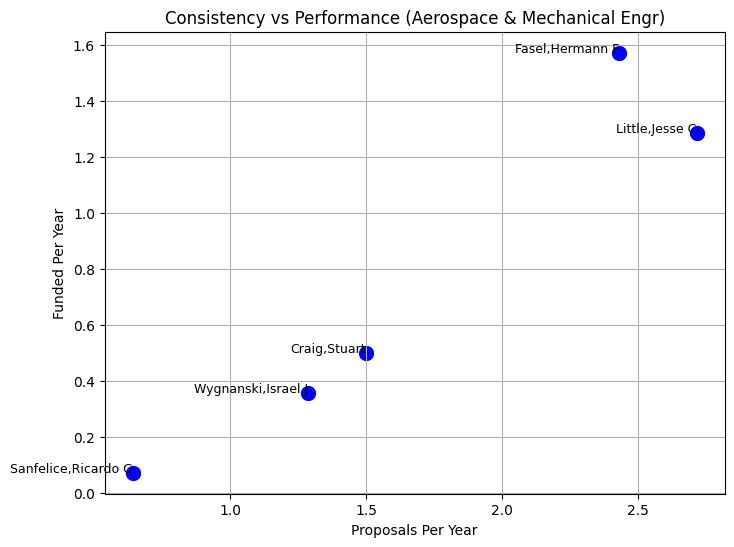

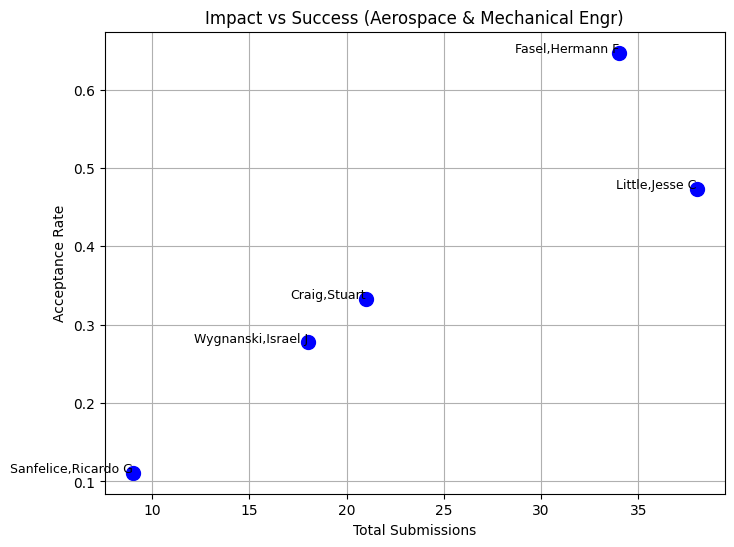

<ipython-input-8-8f63b4c8e7aa>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_professors["Proposals_Per_Year"] = top_5_professors["Total_Submissions"] / (2024 - 2010)
<ipython-input-8-8f63b4c8e7aa>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_professors["Funded_Per_Year"] = top_5_professors["Funded_Count"] / (2024 - 2010)
<ipython-input-8-8f63b4c8e7aa>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

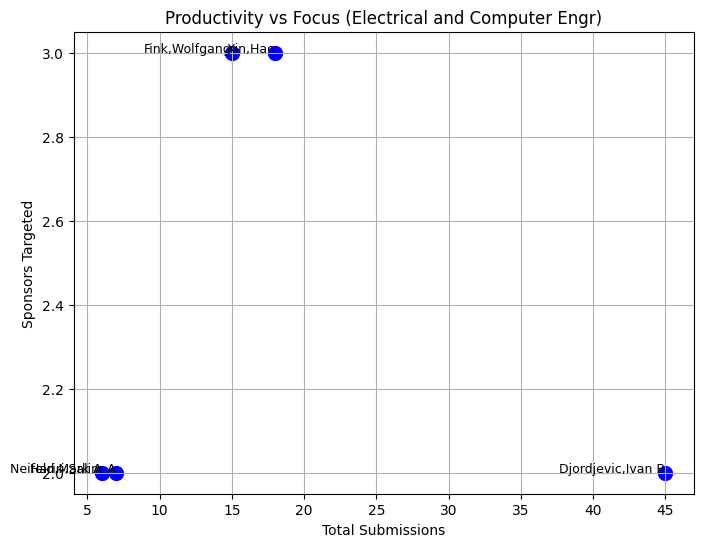

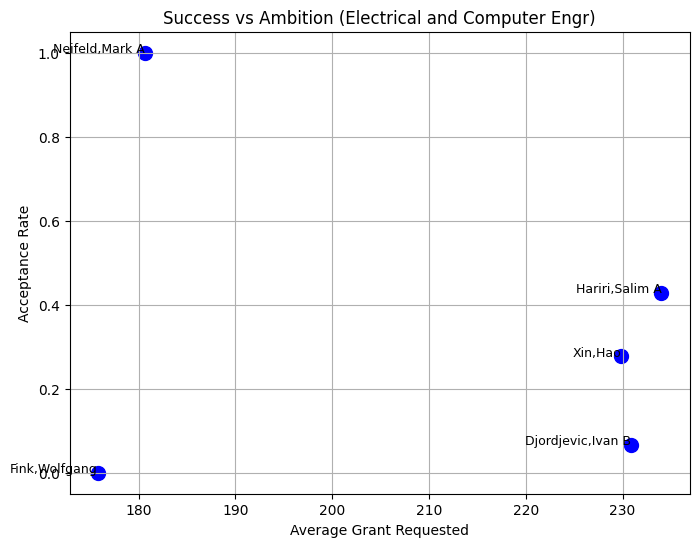

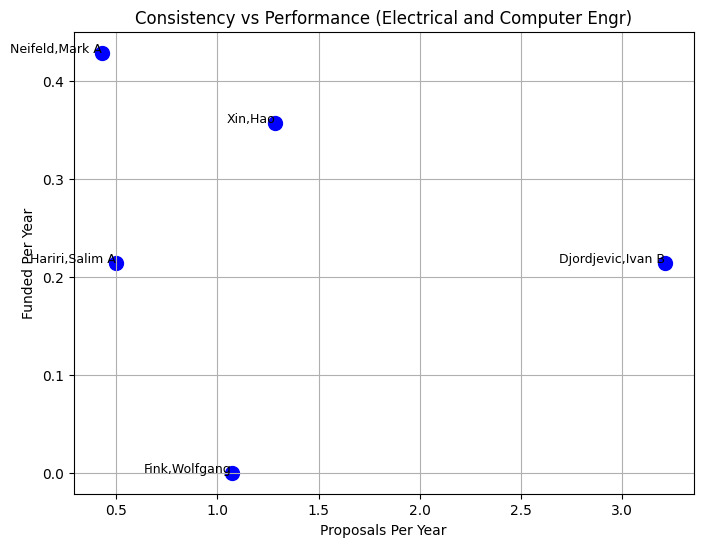

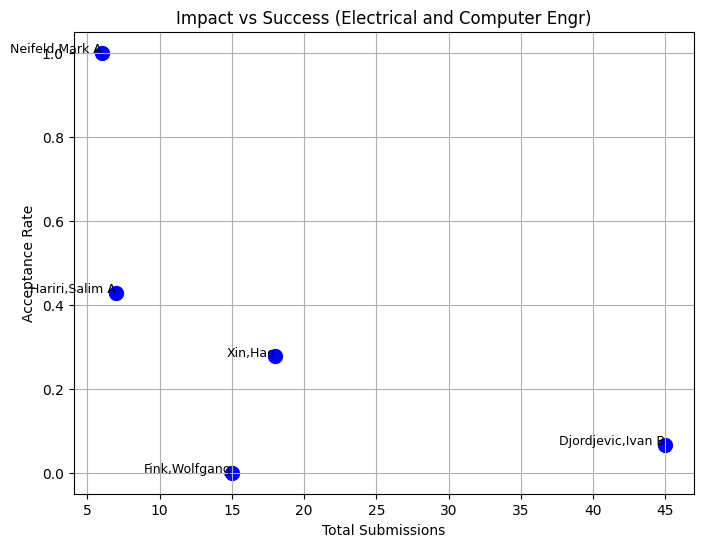

<ipython-input-8-8f63b4c8e7aa>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_professors["Proposals_Per_Year"] = top_5_professors["Total_Submissions"] / (2024 - 2010)
<ipython-input-8-8f63b4c8e7aa>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_professors["Funded_Per_Year"] = top_5_professors["Funded_Count"] / (2024 - 2010)
<ipython-input-8-8f63b4c8e7aa>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

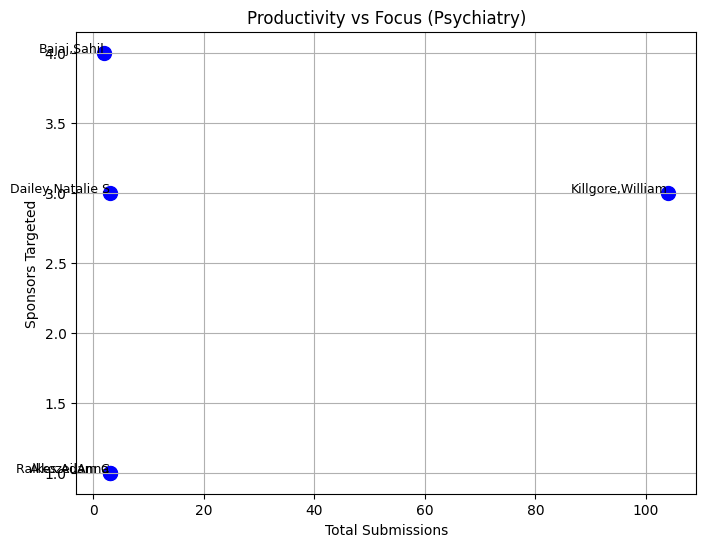

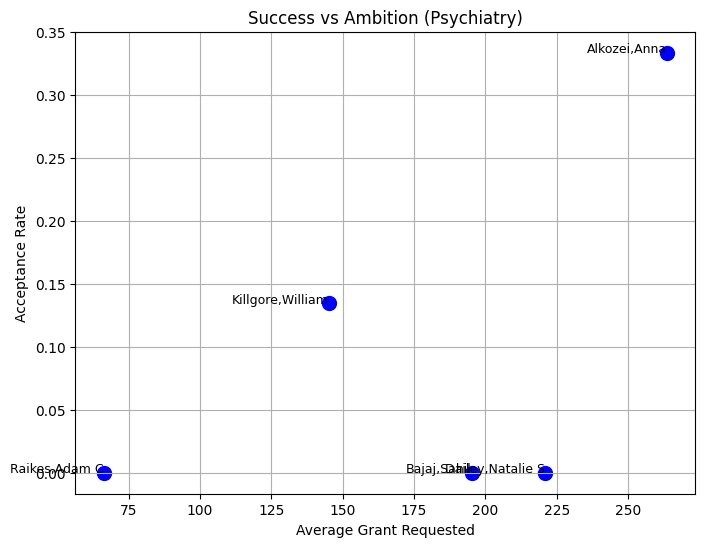

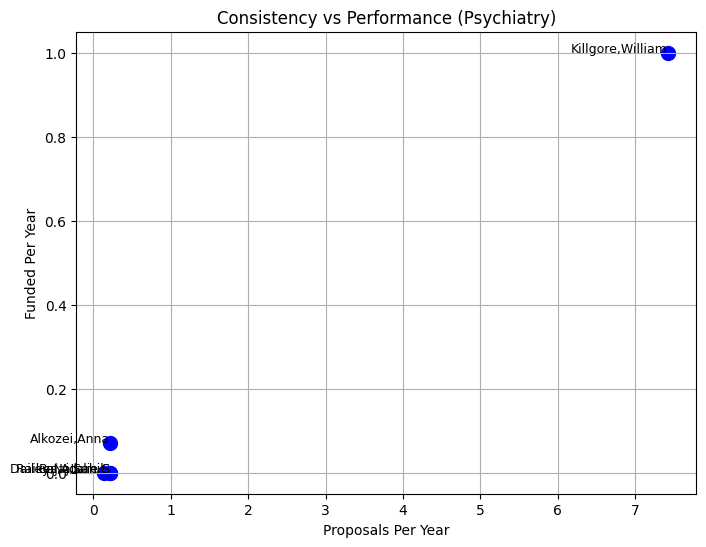

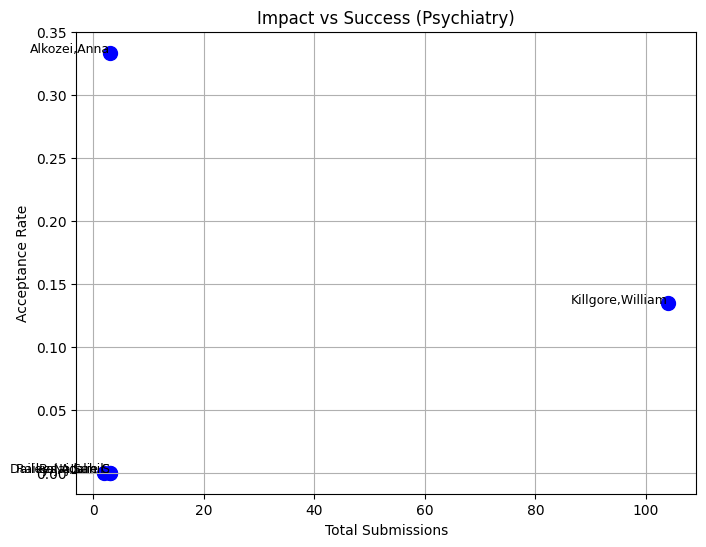

<ipython-input-8-8f63b4c8e7aa>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_professors["Proposals_Per_Year"] = top_5_professors["Total_Submissions"] / (2024 - 2010)
<ipython-input-8-8f63b4c8e7aa>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_professors["Funded_Per_Year"] = top_5_professors["Funded_Count"] / (2024 - 2010)
<ipython-input-8-8f63b4c8e7aa>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

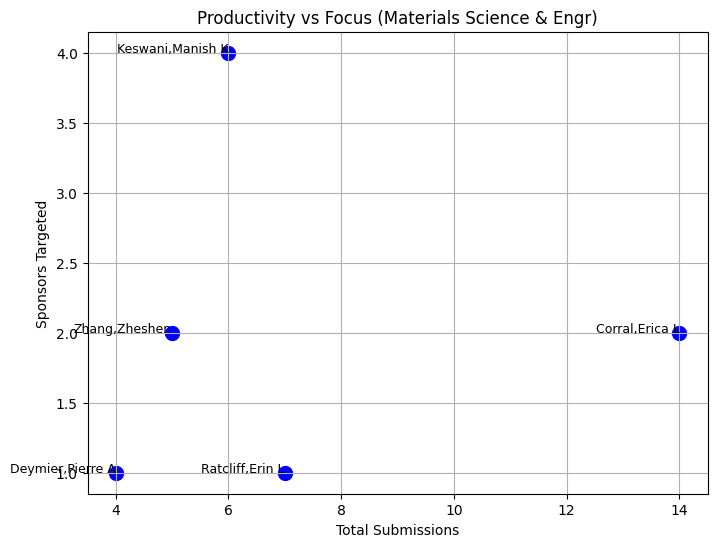

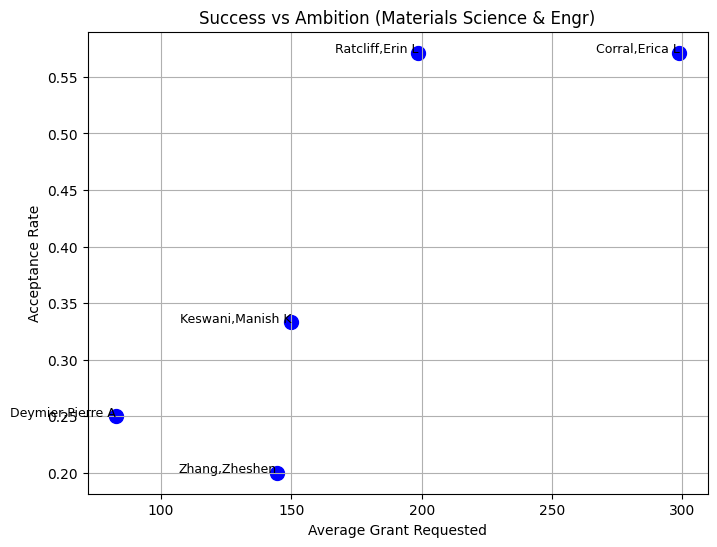

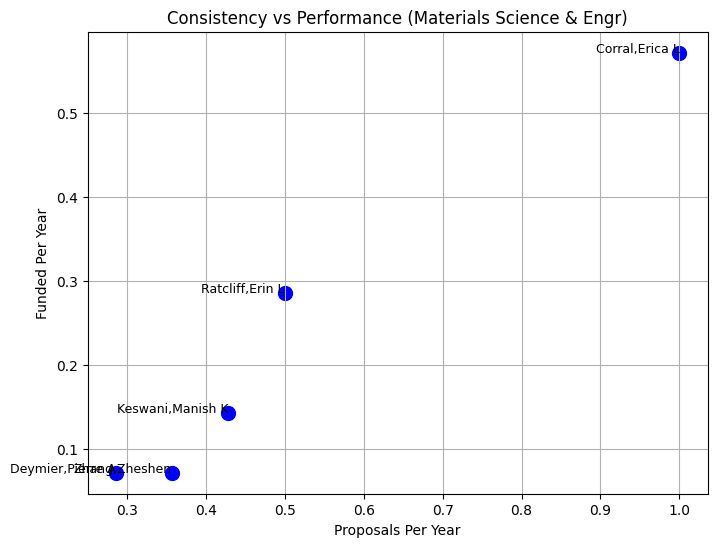

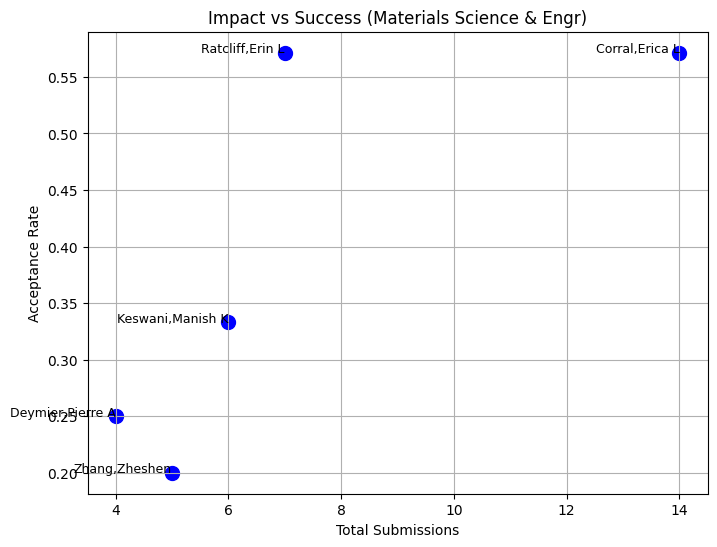

Diversity Measures and Success Rates for Different Combinations:
                           College                 Combination  \
0   James C Wyant Coll Optical Sci       Productivity vs Focus   
1   James C Wyant Coll Optical Sci         Success vs Ambition   
2   James C Wyant Coll Optical Sci  Consistency vs Performance   
3   James C Wyant Coll Optical Sci           Impact vs Success   
4      Aerospace & Mechanical Engr       Productivity vs Focus   
5      Aerospace & Mechanical Engr         Success vs Ambition   
6      Aerospace & Mechanical Engr  Consistency vs Performance   
7      Aerospace & Mechanical Engr           Impact vs Success   
8     Electrical and Computer Engr       Productivity vs Focus   
9     Electrical and Computer Engr         Success vs Ambition   
10    Electrical and Computer Engr  Consistency vs Performance   
11    Electrical and Computer Engr           Impact vs Success   
12                      Psychiatry       Productivity vs Focus   
13         

In [8]:
import matplotlib.pyplot as plt
from ripser import ripser
import numpy as np
import pandas as pd

# Top 5 colleges based on total submissions
college_submission_counts = data.iloc[:, 10].value_counts()
top_5_colleges = college_submission_counts.head(5).index

# Store results for each combination
combinations_results = []

# Define feature combinations
combinations = [
    {"x": "Total_Submissions", "y": "Sponsors_Targeted", "title": "Productivity vs Focus"},
    {"x": "Average_Grant_Requested", "y": "Acceptance_Rate", "title": "Success vs Ambition"},
    {"x": "Proposals_Per_Year", "y": "Funded_Per_Year", "title": "Consistency vs Performance"},
    {"x": "Total_Submissions", "y": "Acceptance_Rate", "title": "Impact vs Success"},
]

# Iterate over each college
for college in top_5_colleges:
    # Filter data for the college
    college_data = data[data.iloc[:, 10] == college]
    college_data = college_data[~college_data.iloc[:, 8].isin(["Pending"])]

    # Calculate overall success rate
    funded_count = sum(college_data.iloc[:, 8] == "Funded")
    total_count = len(college_data)
    success_rate = funded_count / total_count if total_count > 0 else 0

    # Compute stats for top 5 professors
    professor_stats = college_data.groupby(college_data.iloc[:, 9]).apply(
        lambda group: pd.Series({
            "Total_Submissions": len(group),
            "Funded_Count": sum(group.iloc[:, 8] == "Funded"),
            "Acceptance_Rate": sum(group.iloc[:, 8] == "Funded") / len(group)
        })
    )
    professor_stats = professor_stats.sort_values(
        by=["Total_Submissions", "Acceptance_Rate"], ascending=[False, False]
    )
    top_5_professors = professor_stats.head(5)

    # Mock data for missing features
    top_5_professors["Proposals_Per_Year"] = top_5_professors["Total_Submissions"] / (2024 - 2010)
    top_5_professors["Funded_Per_Year"] = top_5_professors["Funded_Count"] / (2024 - 2010)
    top_5_professors["Average_Grant_Requested"] = np.random.uniform(50, 300, len(top_5_professors))  # Replace if real data is available
    top_5_professors["Sponsors_Targeted"] = np.random.randint(1, 5, len(top_5_professors))  # Replace if real data is available

    # Compute diversity measures for each combination
    for combo in combinations:
        x = combo["x"]
        y = combo["y"]

        # Prepare data for scatter plot and persistence diagram
        ripser_data = top_5_professors[[x, y]].values

        # Scatter plot
        plt.figure(figsize=(8, 6))
        plt.scatter(ripser_data[:, 0], ripser_data[:, 1], color='blue', s=100)
        for i, name in enumerate(top_5_professors.index):
            plt.text(ripser_data[i, 0], ripser_data[i, 1], name, fontsize=9, ha='right')
        plt.title(f"{combo['title']} ({college})")
        plt.xlabel(x.replace("_", " "))
        plt.ylabel(y.replace("_", " "))
        plt.grid(True)
        plt.show()

        # Compute persistence diagram
        if len(ripser_data) > 1:
            rips_results = ripser(ripser_data, maxdim=1)
            H0_diagram = rips_results['dgms'][0]
            lifespans = H0_diagram[:, 1] - H0_diagram[:, 0]
            finite_lifespans = lifespans[np.isfinite(lifespans)]
            diversity_measure = np.mean(finite_lifespans) if len(finite_lifespans) > 0 else 0
        else:
            diversity_measure = 0

        # Append results
        combinations_results.append({
            "College": college,
            "Combination": combo["title"],
            "Diversity_Measure": diversity_measure,
            "Success_Rate": success_rate
        })

# Create DataFrame for results
results_df = pd.DataFrame(combinations_results)

# Display results
print("Diversity Measures and Success Rates for Different Combinations:")
print(results_df)

# Correlation Analysis
for combo in combinations:
    combo_results = results_df[results_df["Combination"] == combo["title"]]
    correlation = combo_results["Diversity_Measure"].corr(combo_results["Success_Rate"])
    print(f"Correlation for {combo['title']}: {correlation:.4f}")
